<a href="https://colab.research.google.com/github/seohyeon1578/TensorFlow/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# 분류(Classification)

잔차의 제곱의 합(SSE), 잔차의 제곱의 평균(MSE)

## 이항 분류(Binary Classification)

In [30]:
# 와인 데이터셋 불러오기
import pandas as pd                                    #pandas: 데이터 정제 및 분석을 위한 라이브러리
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')       #레드 와인
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')   #화이트 와인
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [31]:
# 와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white]) #레드와인 화이트 와인 데이터셋 합치기
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

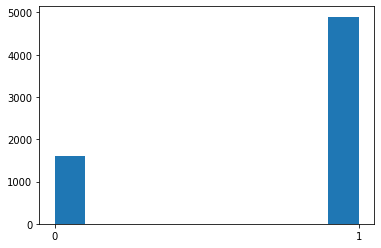

1    4898
0    1599
Name: type, dtype: int64


In [ ]:
# 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

In [32]:
# 데이터 요약 정보 확인
print(wine.info())       # 데이터의 파악을 도와주는 함수

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


출력된 13개의 속성 모두 non-null로 표시되어 null인 값은 하나도 들어있지 않다. 또한 11개는 float64, 2개는 int64로 모두 숫자 값이기 떄문에 안전하게 정규화 가능

In [5]:
# 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [6]:
# 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)               #frac=1 은 100%로 모든 데이터를 뽑아서 섞는 것과 동일한 효과
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()                     #to_numpy(): 데이터프레임을 넘파이 array로 변환
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1143       0.264463          0.093333     0.180723        0.018405   0.093023   
2849       0.322314          0.233333     0.222892        0.144172   0.265781   
1250       0.123967          0.120000     0.138554        0.069785   0.041528   
1423       0.495868          0.113333     0.445783        0.144172   0.078073   
1756       0.239669          0.126667     0.150602        0.113497   0.073090   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1143             0.052083              0.032258  0.185271  0.689922   
2849             0.072917              0.470046  0.205321  0.232558   
1250             0.163194              0.354839  0.155967  0.852713   
1423             0.121528              0.504608  0.204164  0.263566   
1756             0.184028              0.451613  0.173318  0.387597   

      sulphates   alcohol   quality  type  
1143   0.337079  0.289855  0.500000   0.0 

In [ ]:
# train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)                                        # wine_np의 수의 80%에 해당하는 인덱스를 int값으로 저장
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)                 #원-핫인코딩(One-Hot Encoding)방식으로 바꿈
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.2231405  0.11333333 0.27108434 0.11042945 0.06478405 0.17708333
 0.41935484 0.16676306 0.37209302 0.1741573  0.15942029 0.33333333]
1.0
[0.39669421 0.37666667 0.15060241 0.02147239 0.12292359 0.02430556
 0.05069124 0.21283979 0.43410853 0.21348315 0.28985507 0.5       ]
0.0
[0. 1.]
[1. 0.]


In [ ]:
#와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 48)                624       
                                                                 
 dense_17 (Dense)            (None, 24)                1176      
                                                                 
 dense_18 (Dense)            (None, 12)                300       
                                                                 
 dense_19 (Dense)            (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


softmax는 분류 문제나 언어 RNN에서의 다음 토큰 예측, 강화학습에서 에이전트의 행동 확률을 구하는 등 결괏값으로 확률이 필요한 다양한 분야에서 쓰임

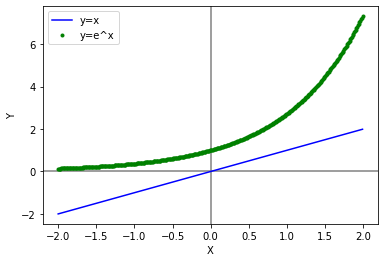

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0315 - accuracy: 0.9928 - val_loss: 0.0396 - val_accuracy: 0.9931
Epoch 2/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0301 - accuracy: 0.9918 - val_loss: 0.0310 - val_accuracy: 0.9931
Epoch 3/25
122/122 [==============================] - 1s 6ms/step - loss: 0.0307 - accuracy: 0.9920 - val_loss: 0.0329 - val_accuracy: 0.9900
Epoch 4/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0342 - accuracy: 0.9920 - val_loss: 0.0292 - val_accuracy: 0.9908
Epoch 5/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0280 - accuracy: 0.9923 - val_loss: 0.0609 - val_accuracy: 0.9877
Epoch 6/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0299 - accuracy: 0.9920 - val_loss: 0.0466 - val_accuracy: 0.9923
Epoch 7/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0379 - accuracy: 0.9908 - val_loss: 0.0242 - val_accuracy: 0.9908
Epoch 

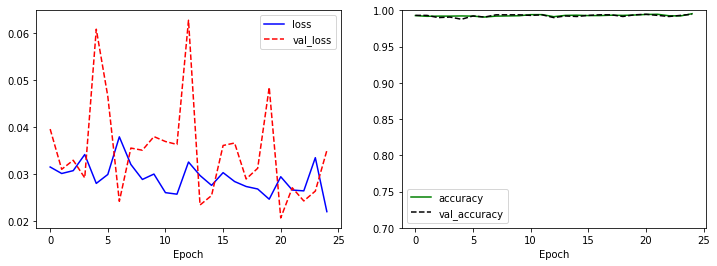

In [ ]:
# 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
# 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9892


[0.045128703117370605, 0.989230751991272]

## 다항 분류

In [33]:
# 와인 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


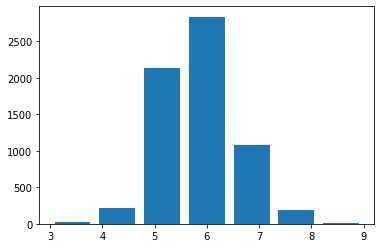

In [34]:
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

데이터의 양이 작고 범주의 수가 많은데다 히스토그램에서 볼 수 있듯이 각 데이터의 숫자가 차이가 나기 때문에 몬든 범주에 대한 세세한 분류는 어려움

In [35]:
# 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2
print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [36]:
data = [['Apple', 11], ['Banana', 23], ['Coconut', 35]]
df = pd.DataFrame(data, columns=['Fruit', 'Count'])
print(df)
print()
print(df.loc[0])
print()
print(df.loc[0, 'Fruit'])

     Fruit  Count
0    Apple     11
1   Banana     23
2  Coconut     35

Fruit    Apple
Count       11
Name: 0, dtype: object

Apple


In [37]:
# 데이터 정규화 및 train, test 데이터 분리
import tensorflow as tf
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [39]:
# 모델 학습
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12, )),
  tf.keras.layers.Dense(units=24, activation='relu'),
  tf.keras.layers.Dense(units=12, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


122/122 [==============================] - 3s 5ms/step - loss: 0.9519 - accuracy: 0.5140 - val_loss: 0.9059 - val_accuracy: 0.5331
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 0.8755 - accuracy: 0.5625 - val_loss: 0.8969 - val_accuracy: 0.5585
Epoch 3/25
122/122 [==============================] - 0s 4ms/step - loss: 0.8718 - accuracy: 0.5635 - val_loss: 0.8893 - val_accuracy: 0.5354
Epoch 4/25
122/122 [==============================] - 0s 4ms/step - loss: 0.8564 - accuracy: 0.5745 - val_loss: 0.8861 - val_accuracy: 0.5700
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.8548 - accuracy: 0.5751 - val_loss: 0.9147 - val_accuracy: 0.5438
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 0.8499 - accuracy: 0.5902 - val_loss: 0.8660 - val_accuracy: 0.5554
Epoch 7/25
122/122 [==============================] - 0s 4ms/step - loss: 0.8440 - accuracy: 0.5781 - val_loss: 0.8690 - val_accuracy: 0.5646
Epoch 8/25
122/12

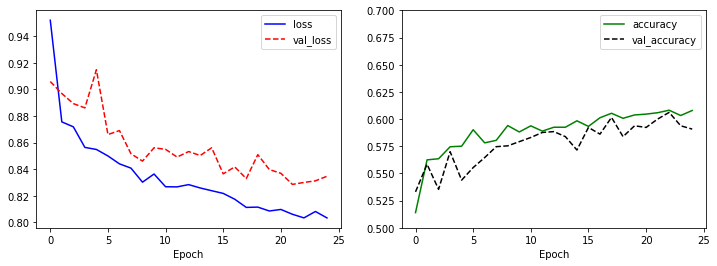

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 0.7)
plt.legend()

plt.show()

In [43]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 4ms/step - loss: 0.8189 - accuracy: 0.6054


[0.8188809752464294, 0.6053845882415771]

## Fashion MNIST

In [46]:
# Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


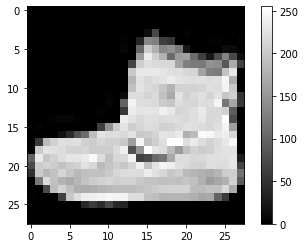

9


In [49]:
# 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')     #imshow(): 이미지를 그래프의 형태로 표시
plt.colorbar()
plt.show()

print(train_Y[0])

In [50]:
# 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [53]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),          #Flatten 다차원 데이터를 1차원으로 정렬
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')                            
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])   #sparse는 희소 행렬을 뜻함

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [54]:
# 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5201 - accuracy: 0.8163 - val_loss: 0.4050 - val_accuracy: 0.8545
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3899 - accuracy: 0.8607 - val_loss: 0.4071 - val_accuracy: 0.8519
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3508 - accuracy: 0.8718 - val_loss: 0.3683 - val_accuracy: 0.8671
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3268 - accuracy: 0.8799 - val_loss: 0.3531 - val_accuracy: 0.8732
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3044 - accuracy: 0.8884 - val_loss: 0.3796 - val_accuracy: 0.8632
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2875 - accuracy: 0.8927 - val_loss: 0.3252 - val_accuracy: 0.8832
Epoch 7/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2735 - accuracy: 0.8996 - val_loss: 0.3566 - val_accuracy:

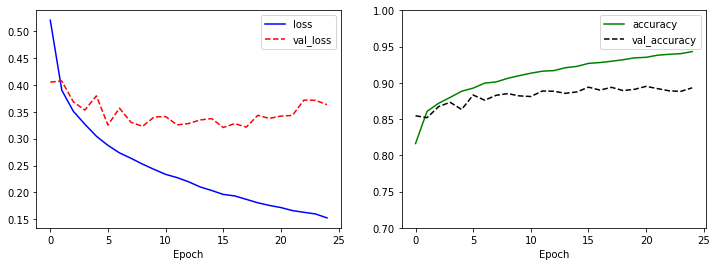

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [56]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.4038 - accuracy: 0.8821


[0.4038475453853607, 0.882099986076355]